<a href="https://colab.research.google.com/github/Rujul-Patel/Data-Science-and-ML/blob/master/Deep-Learning/MNIST_Handwritten_Digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN to classify handwritten digits 
----

### Importing Tensorflow and MNIST Dataset

In [45]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist

#Other Libraries
import numpy as np

#Plot Paramenters
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16,8)

##### Importing MNIST Dataset

In [46]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

#Dataset size
print("Training Data Shape \t: X : ",X_train.shape, " y : ",y_train.shape)
print("Test Data Shape \t: X : ",X_test.shape, " y : ",y_test.shape)

Training Data Shape 	: X :  (60000, 28, 28)  y :  (60000,)
Test Data Shape 	: X :  (10000, 28, 28)  y :  (10000,)


Thus, we have total of 70,000 28X28 pixels images, of which 60,000 are in training set and rest 10,000 in test data set

### Preview Few Random Images
-------


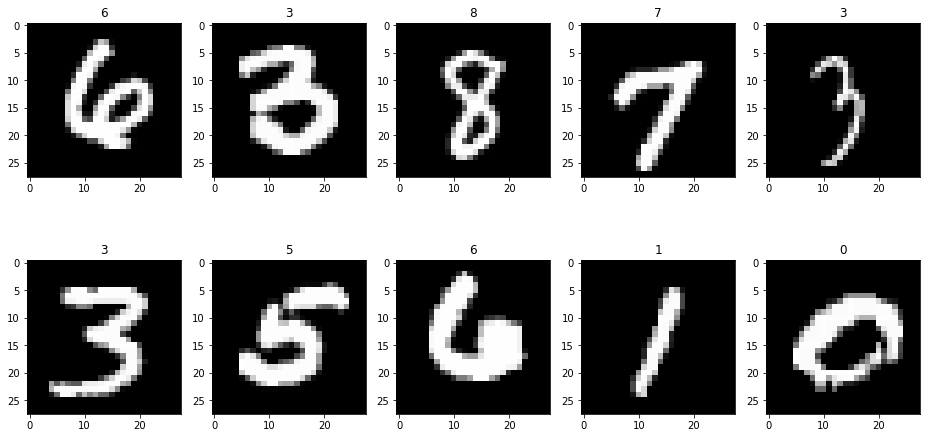

In [47]:
rand_arr = np.random.randint(low=1,high=len(X_train),size=(10,))
for i in range(0,len(rand_arr)):
  plt.subplot(2,5,i+1)
  plt.imshow(X_train[rand_arr[i]],cmap=plt.get_cmap('gray'))
  plt.title(y_train[rand_arr[i]])

#### Preprocess Data

In [48]:
#One-hot encode the y variable
y_train  = tf.one_hot(y_train,depth=10)
y_test = tf.one_hot(y_test,depth=10)

#Normalizing
X_train = X_train/255.0
X_test = X_test/255.0

# Creating a Shallow Neural Network Model

In [5]:
shallow_model = tf.keras.models.Sequential()
shallow_model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
shallow_model.add(tf.keras.layers.Dense(128,activation='sigmoid',kernel_regularizer=tf.keras.regularizers.l2(0.001)))
shallow_model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [6]:
#Compile the Model
shallow_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

%time history = shallow_model.fit(X_train,y_train,validation_split=0.166,epochs=30,batch_size=10)

Epoch 1/30
5004/5004 [==============================] - 15s 3ms/step - loss: 0.5586 - accuracy: 0.8860 - val_loss: 0.4177 - val_accuracy: 0.9177
Epoch 2/30
5004/5004 [==============================] - 15s 3ms/step - loss: 0.4182 - accuracy: 0.9135 - val_loss: 0.3644 - val_accuracy: 0.9301
Epoch 3/30
5004/5004 [==============================] - 16s 3ms/step - loss: 0.3809 - accuracy: 0.9218 - val_loss: 0.3541 - val_accuracy: 0.9295
Epoch 4/30
5004/5004 [==============================] - 15s 3ms/step - loss: 0.3576 - accuracy: 0.9305 - val_loss: 0.3277 - val_accuracy: 0.9400
Epoch 5/30
5004/5004 [==============================] - 15s 3ms/step - loss: 0.3387 - accuracy: 0.9349 - val_loss: 0.3113 - val_accuracy: 0.9471
Epoch 6/30
5004/5004 [==============================] - 15s 3ms/step - loss: 0.3267 - accuracy: 0.9369 - val_loss: 0.2991 - val_accuracy: 0.9457
Epoch 7/30
5004/5004 [==============================] - 15s 3ms/step - loss: 0.3145 - accuracy: 0.9407 - val_loss: 0.2943 - val_ac

In [7]:
score, acc = shallow_model.evaluate(X_test,y_test)
print('Test Score : ',score)
print('Test Accuracy : ',round((acc*100),2),"%")

313/313 [==============================] - 1s 3ms/step - loss: 0.2061 - accuracy: 0.9642
Test Score :  0.2061159610748291
Test Accuracy :  96.42 %


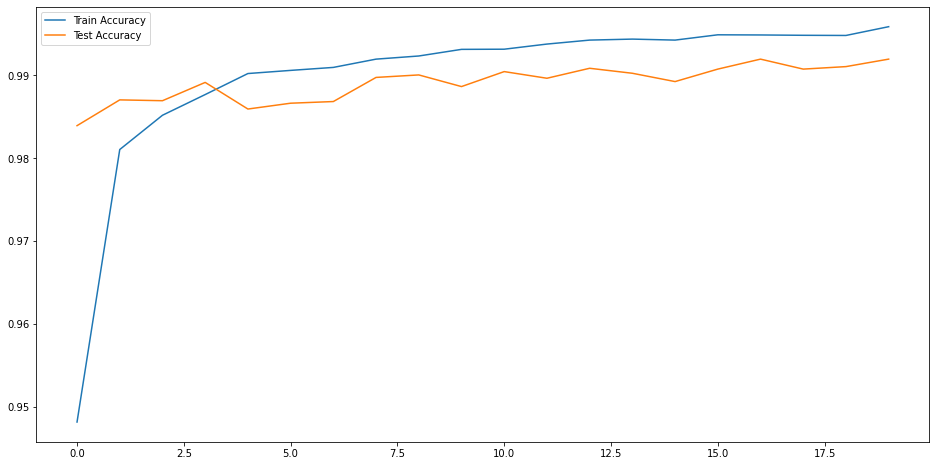

In [49]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.legend()

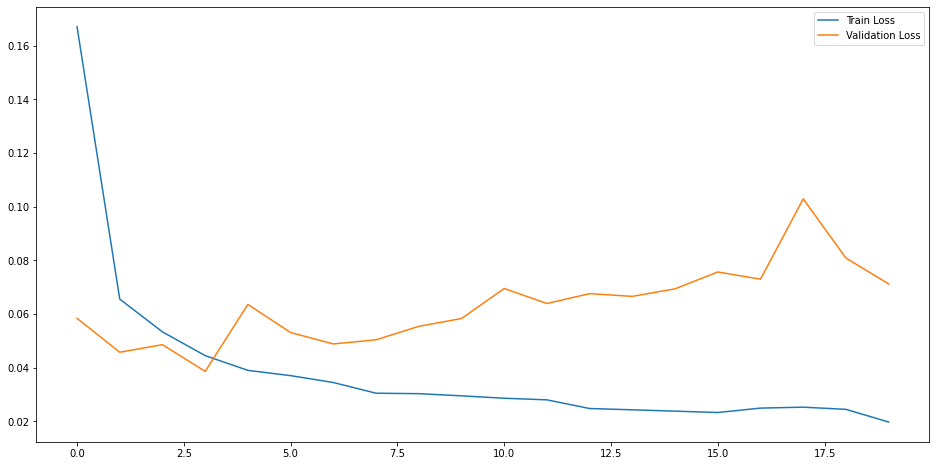

In [50]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()

# Convolution Neural Network
-------

In [24]:
trainx = X_train.reshape(X_train.shape[0],28,28,1)
testx = X_test.reshape(X_test.shape[0],28,28,1)

In [37]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(30,(5,5),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Conv2D(60,(5,5),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D((2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(500,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1000,activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [39]:
%time history = model.fit(trainx,y_train,validation_split=0.166,epochs=20,batch_size=20)

Epoch 1/20
2502/2502 [==============================] - 18s 7ms/step - loss: 0.1671 - accuracy: 0.9482 - val_loss: 0.0584 - val_accuracy: 0.9839
Epoch 2/20
2502/2502 [==============================] - 17s 7ms/step - loss: 0.0655 - accuracy: 0.9811 - val_loss: 0.0457 - val_accuracy: 0.9870
Epoch 3/20
2502/2502 [==============================] - 17s 7ms/step - loss: 0.0533 - accuracy: 0.9852 - val_loss: 0.0486 - val_accuracy: 0.9869
Epoch 4/20
2502/2502 [==============================] - 17s 7ms/step - loss: 0.0445 - accuracy: 0.9877 - val_loss: 0.0386 - val_accuracy: 0.9892
Epoch 5/20
2502/2502 [==============================] - 17s 7ms/step - loss: 0.0390 - accuracy: 0.9902 - val_loss: 0.0636 - val_accuracy: 0.9859
Epoch 6/20
2502/2502 [==============================] - 18s 7ms/step - loss: 0.0370 - accuracy: 0.9906 - val_loss: 0.0531 - val_accuracy: 0.9866
Epoch 7/20
2502/2502 [==============================] - 17s 7ms/step - loss: 0.0344 - accuracy: 0.9910 - val_loss: 0.0488 - val_ac

In [40]:
score, acc = model.evaluate(testx,y_test)
print('Test Score : ',score)
print('Test Accuracy : ',round((acc*100),2),"%")

313/313 [==============================] - 1s 4ms/step - loss: 0.0590 - accuracy: 0.9919
Test Score :  0.05897741764783859
Test Accuracy :  99.19 %


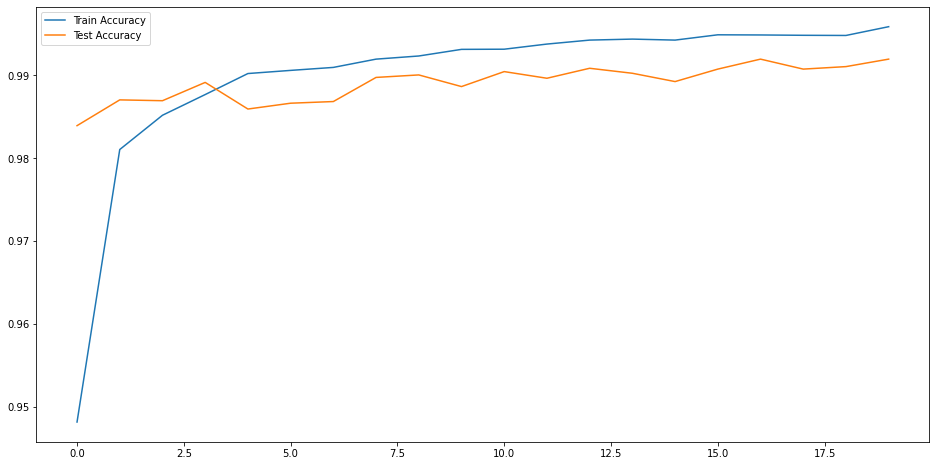

In [51]:
plt.plot(history.history['accuracy'],label='Train Accuracy')
plt.plot(history.history['val_accuracy'],label='Test Accuracy')
plt.legend()

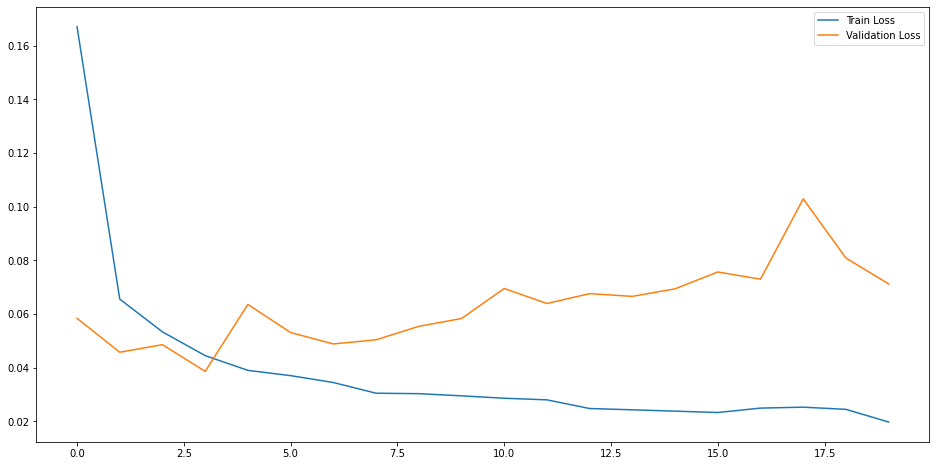

In [52]:
plt.plot(history.history['loss'],label='Train Loss')
plt.plot(history.history['val_loss'],label='Validation Loss')
plt.legend()